In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
import os
import skimage
from skimage.util import montage
import nibabel
import csv
patients = ['sub-AD4215', 'sub-AD4500', 'sub-AD6264']

raw_data_reverted = {}
for patient in patients:
    raw_data_reverted[patient] = pd.read_csv('output/' + patient + '/connect_matrix_reverted.csv')
raw_data_rough = {}
for patient in patients:
    raw_data_rough[patient] = pd.read_csv('output/sub-AD4009/connect_matrix_rough.csv')

In [2]:
data_reverted = {}
data_rough = {}
for patient in patients: 
    data_reverted[patient] = np.array(raw_data_reverted[patient])
    data_rough[patient] = np.array(raw_data_rough[patient])
    #print(patient,  'reverted')
    #plt.imshow(data_reverted[patient])
    #plt.show()
    #print(patient, 'rough')
    #plt.imshow(data_rough[patient])
    #plt.show()

(181, 217, 181)


C:\Users\anith\AppData\Local\Temp/ipykernel_12732/3073021149.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  regions = nibabel.load('aal.nii.gz').get_data()


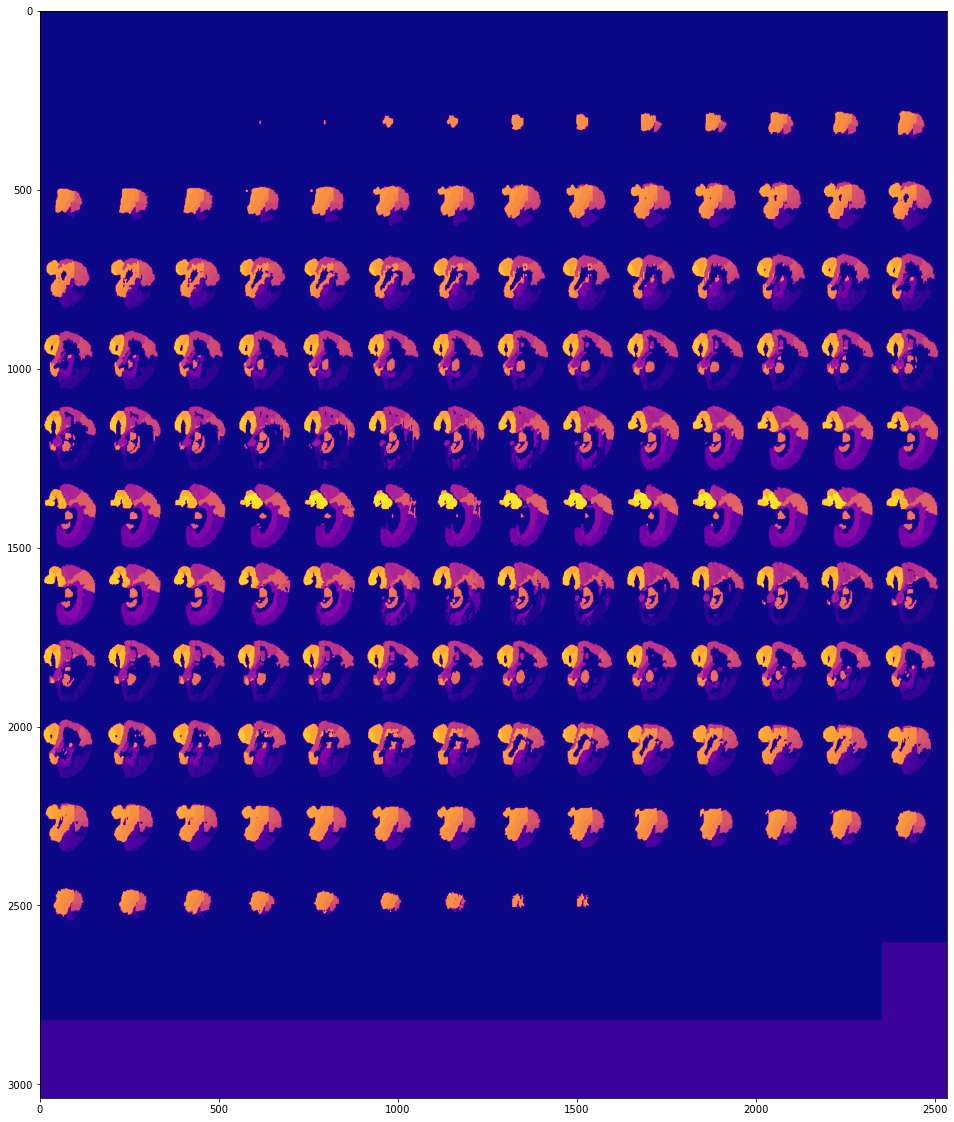

In [3]:
#Visualize brain regions from atlas  
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
regions = nibabel.load('aal.nii.gz').get_data()
print(np.array(regions).shape)
ax1.imshow(montage(regions), cmap ='plasma')


C:\Users\anith\AppData\Local\Temp/ipykernel_12732/652778563.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image = nibabel.load("PET_data\sub-AD4215\ses-1\pet-abeta-av45\sub-AD4215_ses-1_acq-AP_pet-abeta-av45[2011-10-24]_opt.nii.gz").get_data()


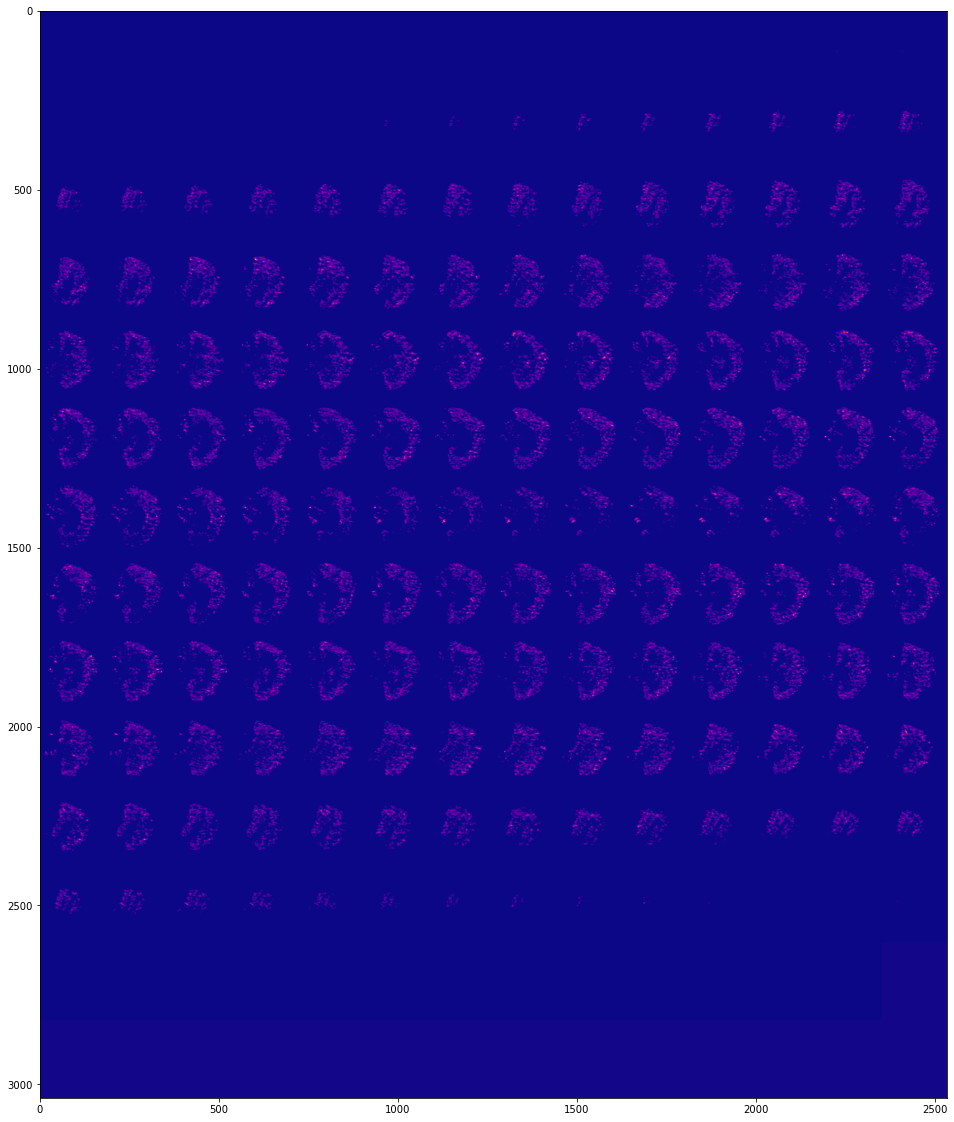

In [4]:
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
test_image = nibabel.load("PET_data\sub-AD4215\ses-1\pet-abeta-av45\sub-AD4215_ses-1_acq-AP_pet-abeta-av45[2011-10-24]_opt.nii.gz").get_data()
ax1.imshow(montage(test_image[:,:,:,3]),cmap='plasma')


In [5]:
#given the region map, the t0 PET, the t1 PET, return the normalized region t0 and t1 means
def extractRegionMeans(regionMap, PET0, PET1):
    PET0 = PET0[:,:,:,3]
    PET1 = PET1[:,:,:,3]
    means = []
    meansAfter = []
    for i in range(1,117):
        means.append(PET0[np.where(i == regionMap)].mean())
        meansAfter.append(PET1[np.where(i == regionMap)].mean())
    maximum_region = max(means+meansAfter)
    minimum_region = min(means+meansAfter)
    normalized = (means- minimum_region)/(maximum_region-minimum_region)
    normalizedAfter = (meansAfter - minimum_region) / (maximum_region-minimum_region)
    return normalized, normalizedAfter



In [6]:
import os
#input: tuple(patient name, array)
def saveToTextFile(tup):
    os.remove('nodeIntensities'+tup[0]+'t0.csv')
    os.remove('nodeIntensities'+tup[0]+'t1.csv')
    with open('nodeIntensities'+tup[0]+'t0.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(tup[1])
    with open('nodeIntensities'+tup[0]+'t1.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(tup[2])

In [7]:
#pets for each patient, in tuples (patient, t0, t1)
PETS = [('AD4215', "PET_data\sub-AD4215\ses-1\pet-abeta-av45\sub-AD4215_ses-1_acq-AP_pet-abeta-av45[2011-10-24]_opt.nii.gz", "PET_data\sub-AD4215\ses-1\pet-abeta-av45\sub-AD4215_ses-1_acq-AP_pet-abeta-av45[2013-11-05]_opt.nii.gz"),
       ('AD4500', "PET_data\sub-AD4500\ses-1\pet-abeta-av45\sub-AD4500_ses-1_acq-AP_pet-abeta-av45[2012-03-07]_opt.nii.gz", "PET_data\sub-AD4500\ses-1\pet-abeta-av45\sub-AD4500_ses-1_acq-AP_pet-abeta-av45[2014-02-04]_opt.nii.gz"),
       ('AD6264', "PET_data\sub-AD6264\ses-1\pet-abeta-av45\sub-AD6264_ses-1_acq-AP_pet-abeta-av45[2018-09-24]_opt.nii.gz","PET_data\sub-AD6264\ses-1\pet-abeta-av45\sub-AD6264_ses-1_acq-AP_pet-abeta-av45[2020-10-12]_opt.nii.gz")]

In [17]:
data = []
labels = []
for i in PETS:
    pet0 = nibabel.load(i[1]).get_data()
    pet1 = nibabel.load(i[2]).get_data()
    regionMeans, regionMeansAfter = extractRegionMeans(regions,pet0,pet1)
    data.append(regionMeans)
    labels.append(regionMeansAfter)
#   saveToTextFile((i[0], regionMeans,regionMeansAfter))

C:\Users\anith\AppData\Local\Temp/ipykernel_12732/1757749198.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  pet0 = nibabel.load(i[1]).get_data()
C:\Users\anith\AppData\Local\Temp/ipykernel_12732/1757749198.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  pet1 = nibabel.load(i[2]).get_data()


In [9]:
def fromRegionMeans(means, region):
    output = np.zeros(region.shape)
    for i in range(1,117):
        output[np.where(region==i)] = means[i-1]
    return output
    

In [10]:
from sklearn.linear_model import LinearRegression
#regression using all three data points 
reg3 = LinearRegression().fit(data,labels)
#regressions using 2 data points and one validation 


C:\Users\anith\AppData\Local\Temp/ipykernel_12732/709246040.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data4009 = nibabel.load("PET_data\sub-AD4009\ses-1\pet-abeta-av45\sub-AD4009_ses-1_acq-AP_pet-abeta-av45[2011-07-07]_opt.nii.gz").get_data()


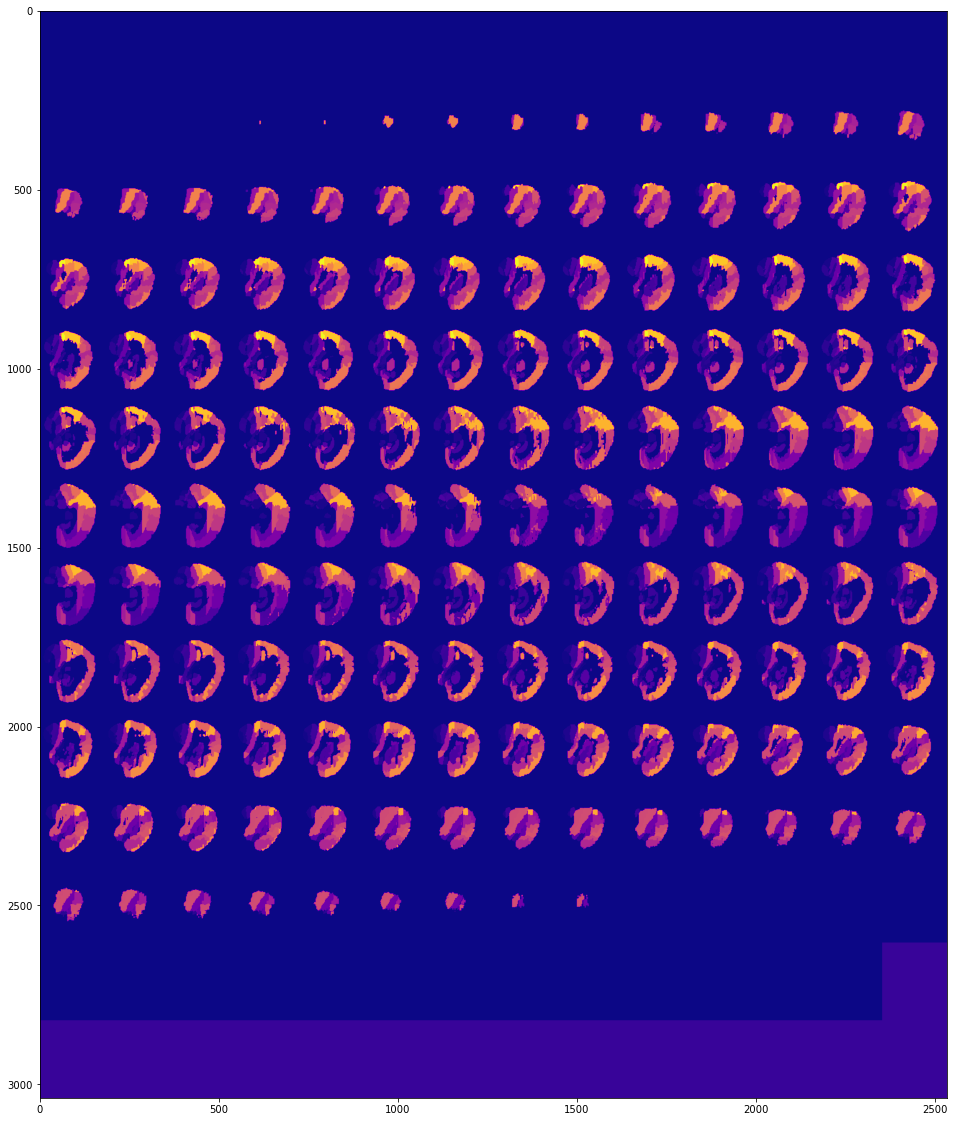

In [12]:
data4009 = nibabel.load("PET_data\sub-AD4009\ses-1\pet-abeta-av45\sub-AD4009_ses-1_acq-AP_pet-abeta-av45[2011-07-07]_opt.nii.gz").get_data()
pred = reg3.predict([(extractRegionMeans(regions, data4009, data4009)[0])])
fig, ax1 = plt.subplots(1,1,figsize=(20,20))
ax1.imshow(montage(fromRegionMeans(pred[0],regions)),cmap='plasma')

AttributeError: 'int' object has no attribute 'get_array'

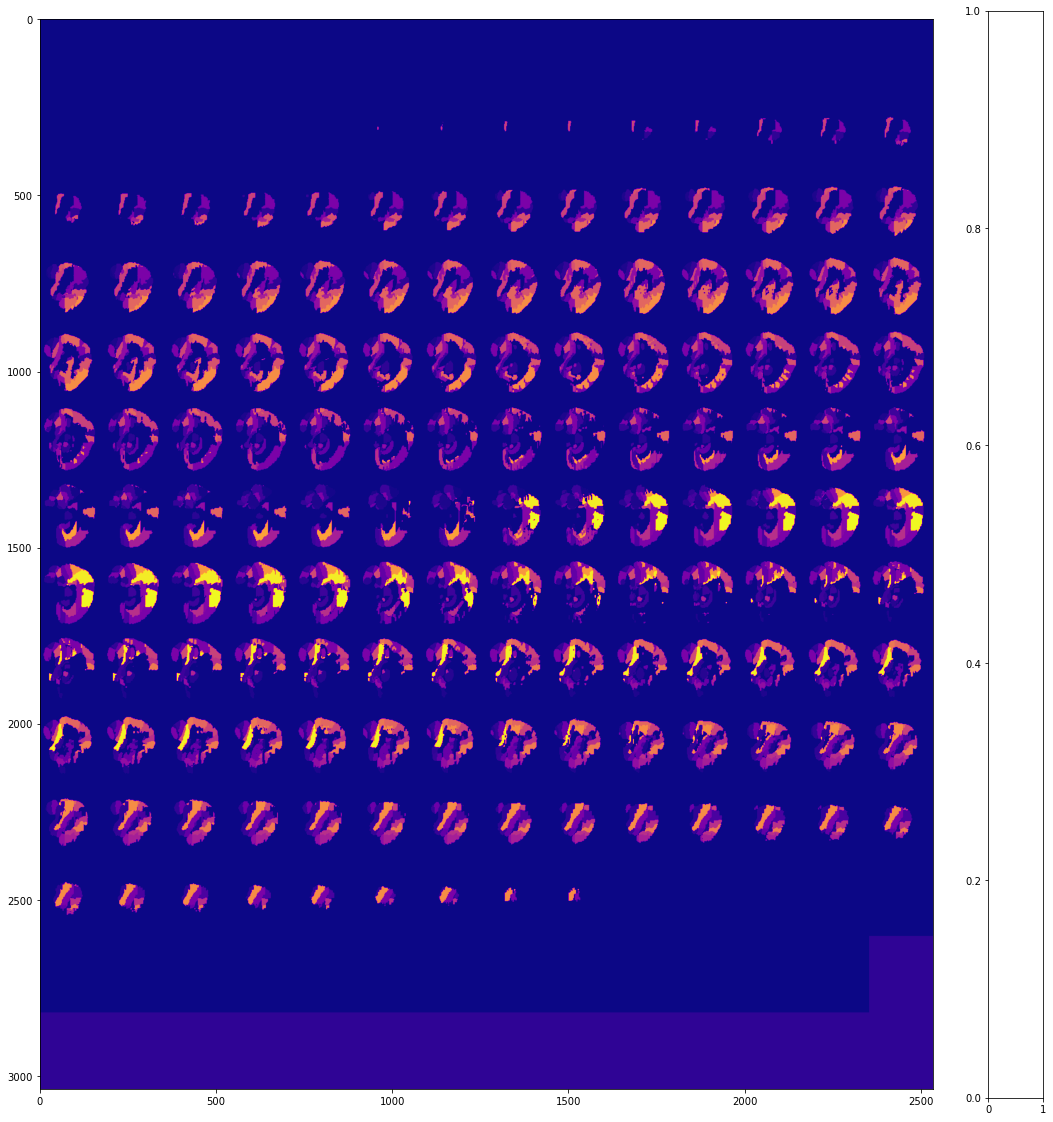

In [13]:
test_regressions = []
for i in range(3):
    temp_data = np.delete(data, i, 0)
    temp_labels = np.delete(labels,i,0)
    test_regressions.append(LinearRegression().fit(temp_data,temp_labels))
    test_sample = data[i]
    test_label = labels[i]
    pred = test_regressions[i].predict([test_sample])
#     print("error by removing", (i+1), "datapoint:")
#     print(np.linalg.norm(pred[0]-test_label))
#     print("error from model using all 3 data points on", str(i+1)+"th data point:")
    pred1 = reg3.predict([test_sample])
#     print(np.linalg.norm(pred1[0]-test_label))
    
    if i == 2:
        fig, ax1 = plt.subplots(1,1,figsize=(20,20))
        ax1.imshow(montage(np.abs(fromRegionMeans(np.abs(pred1[0]-test_label),regions))),cmap='plasma')
        fig.colorbar(0, ax=ax1)

C:\Users\anith\AppData\Local\Temp/ipykernel_12732/3733550467.py:51: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data.append(nibabel.load(files[i]).get_data())


61173.887


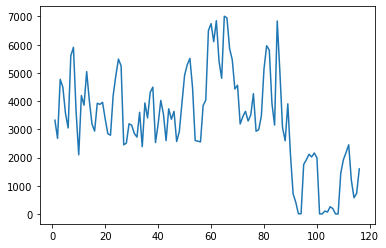

In [14]:
#2018-09-24
#2019-9-24
#2020-10-13
files = ["PET_data\sub-AD6264\ses-1\pet-abeta-av45\sub-AD6264_ses-1_acq-AP_pet-abeta-av45[2018-09-24]_opt.nii.gz",
        "PET_data\sub-AD6264\ses-1\pet-abeta-av45\sub-AD6264_ses-1_acq-AP_pet-abeta-av45[2019-09-24]_opt.nii.gz",
         "PET_data\sub-AD6264\ses-1\pet-abeta-av45\sub-AD6264_ses-1_acq-AP_pet-abeta-av45[2020-10-13]_opt.nii.gz"]
dates = ["2018-09-24", "2019-9-24", "2020-10-13"]
def extractExtraRegionMeans(regionMap, PET0, PET1, PET2):
    PET0 = PET0[:,:,:,1]
    PET1 = PET1[:,:,:,1]
    PET2 = PET2[:,:,:,1]
    means0 = []
    means1 = []
    means2 = []
    for i in range(1,117):
        means0.append(PET0[np.where(i == regionMap)].mean())
        means1.append(PET1[np.where(i == regionMap)].mean())
        means2.append(PET2[np.where(i == regionMap)].mean())

    maximum_region0 = max(means0)
    maximum_region1 = max(means1)
    maximum_region2 = max(means2)
    minimum_region0 = min(means0)
    minimum_region1 = min(means1)
    minimum_region2 = min(means2)

    
    normalized0 = (means0- minimum_region0)/(maximum_region0-minimum_region0)
    normalized1 = (means1 - minimum_region1) / (maximum_region1-minimum_region1)
    normalized2 =  (means2 - minimum_region2) / (maximum_region2-minimum_region2)
    return means0, means1, means2 # normalized0, normalized1, normalized2


def saveToTextFile(tup):
#     os.remove('nodeIntensities'+tup[0]+'t0.csv')
#     os.remove('nodeIntensities'+tup[0]+'t1.csv')
#     os.remove('nodeIntensities'+tup[0]+'t2.csv')
    
    with open('nodeIntensities'+tup[0]+'t0.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(tup[1])
    with open('nodeIntensities'+tup[0]+'t1.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(tup[2])
    with open('nodeIntensities'+tup[0]+'t2.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(tup[3])

data = []
for i in range(len(files)):
    data.append(nibabel.load(files[i]).get_data())

one, two, three = extractExtraRegionMeans(regions, data[0],data[1],data[2])
print(np.linalg.norm(np.concatenate([one,two,three])))
plt.plot(np.arange(1,117),one)
#saveToTextFile(("-not-normalized-sub-AD6264", one, two, three))
    


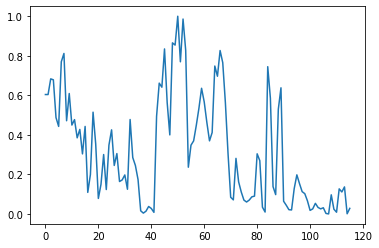

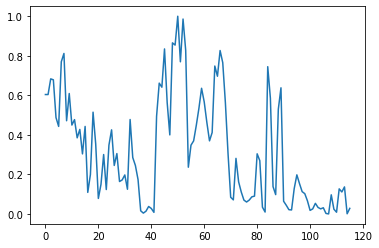

In [21]:

reg3 = LinearRegression().fit(data,labels)
sample = data[0]
plt.plot(sample)
plt.show()
iters = 100
for i in range(iters):
    sample = reg3.predict([sample])[0]
plt.plot(sample)